#      <center>**Minería de Datos</center>**
###     <center>Presentación Final - USA House Prices</center>

#####  <center>Pasos inciales del análisis</center>

<div style="text-align: justify;">
El dataset utilizado será el siguiente: <b><a href="https://www.kaggle.com/datasets/fratzcan/usa-house-prices">USA House Prices</a></b>, además haremos uso de las librerías Pandas, NumPy, Seaborn y SciKit Learn de Python.
</div>

In [77]:
import pandas as pd
import numpy as np

<div style="text-align: justify;">
Como primer paso, crearemos un Data Frame con el dataset.
</div>

In [78]:
data = pd.read_csv('USA Housing Dataset.csv')
house_df = pd.DataFrame(data)

house_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4136,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4137,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


#####  <center>Pre-Procesamiento</center>

<div style="text-align: justify;">
Para el pre-procesamiento, aplicaremos una conversión de tipo en las variables: 'bedrooms' y 'floors'. Convirtiendo sus datos de tipo float64 a int64 para una mejor compresión de los datos. También daremos formate a la variable 'date'
</div>

In [79]:
house_df['bedrooms'] = house_df['bedrooms'].astype('int64')         #   Cast de la variable 'bedrooms' de float a int
house_df['floors'] = np.ceil(house_df['floors']).astype('int64')    #   Cast de la variable 'floors' de float a int
house_df['date'] = pd.to_datetime(house_df['date'])                 #   Cast de la variable 'date' de Object a datetime

<div style="text-align: justify;">
También crearemos las siguientes variables haciendo uso de las ya existentes:
</div>

In [80]:
#   Creamos la variable basement, que indica si una propiedad posee sótano (1) o no (0)
house_df.insert(
    loc = 11,
    column = 'basement',
    value = np.where(house_df['sqft_basement'] == 0, 0, 1)
)

#   Además añadimos una nueva variable que indique si una propiedad ha sido renovada (1) o no (0)
house_df.insert(
    loc = 14,
    column = 'renovated',
    value = np.where(house_df['yr_renovated'] == 0, 0, 1)
)

#####  <center>Análisis Exploratorio de los Datos</center>

<div style="text-align: justify;">
Como primer paso, vamos a importar las librerías necesarias para las visualizaciones.
</div>

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

<div style="text-align: justify;">
Ahora, vamos a observar el nivel de correlación entre variables numéricas de los datos, para la representación haremos uso de un mapa de calor.
</div>

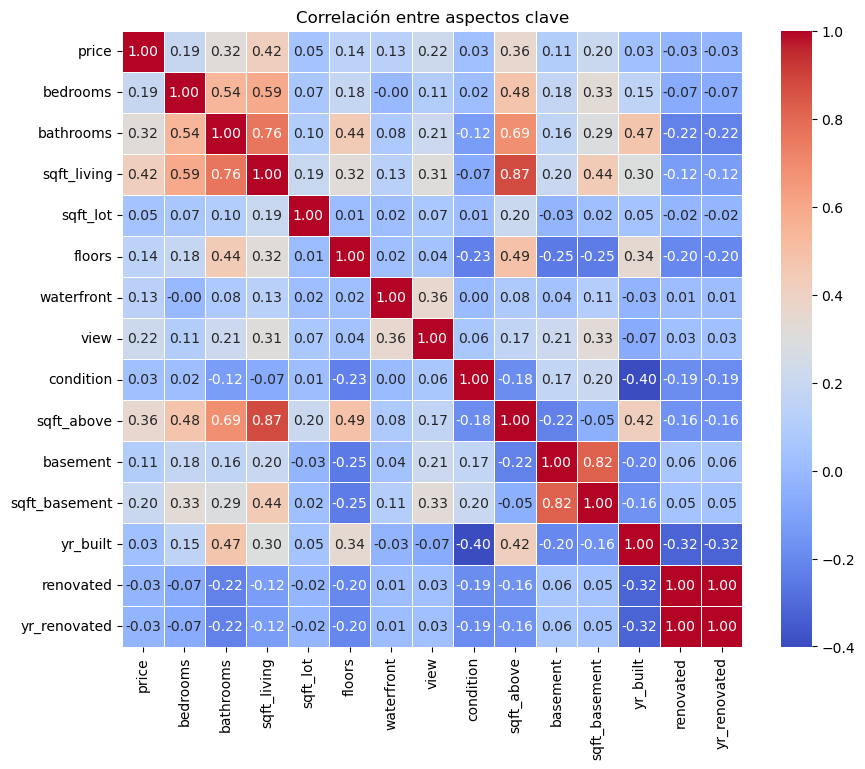

In [82]:
#   Creamos un data frame con solo variables numéricas
correlation_df = house_df.select_dtypes(include = [np.number])

#   Setup de la visualización
plt.figure(figsize = (10, 8))
sns.heatmap(
    correlation_df.corr(),
    annot = True,
    cmap = 'coolwarm',
    fmt = '.2f',
    linewidths = 0.5
    )
plt.title('Correlación entre aspectos clave')
plt.show()

<div style="text-align: justify;">
Podemos observar que las variables que más influyen en el precio son: sqft_living, sqft_above y bathrooms.
</div>

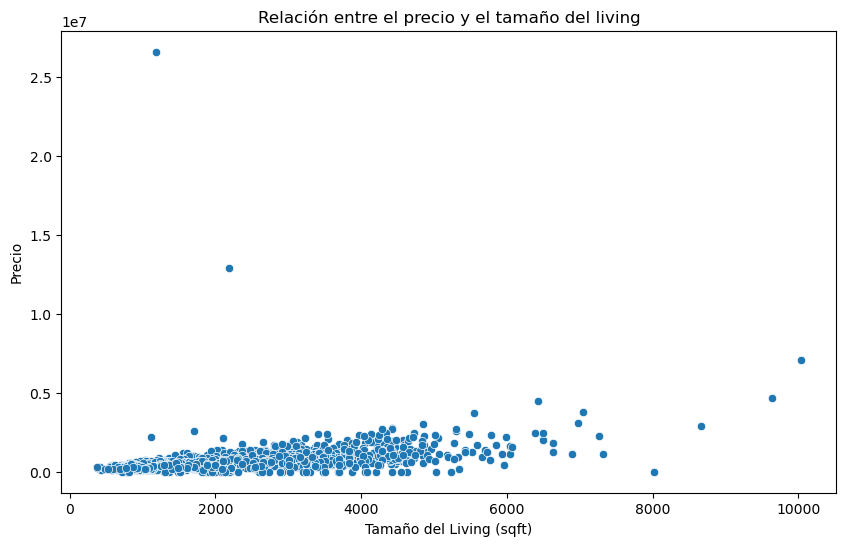

In [83]:
plt.figure(figsize = (10, 6))
sns.scatterplot(
    data = house_df,
    x = 'sqft_living',
    y = 'price'
)

plt.title('Relación entre el precio y el tamaño del living')
plt.xlabel('Tamaño del Living (sqft)')
plt.ylabel('Precio')
plt.show()

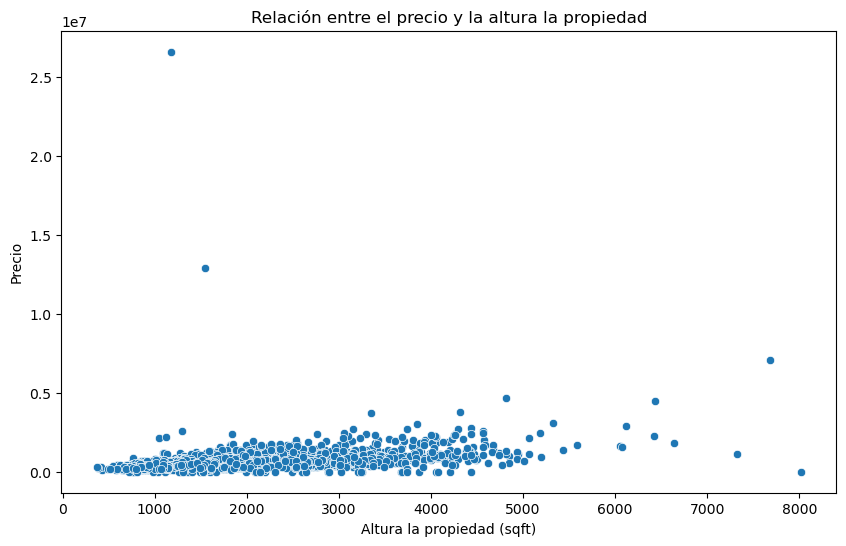

In [84]:
plt.figure(figsize = (10, 6))
sns.scatterplot(
    data = house_df,
    x = 'sqft_above',
    y = 'price'
)

plt.title('Relación entre el precio y la altura la propiedad')
plt.xlabel('Altura la propiedad (sqft)')
plt.ylabel('Precio')
plt.show()

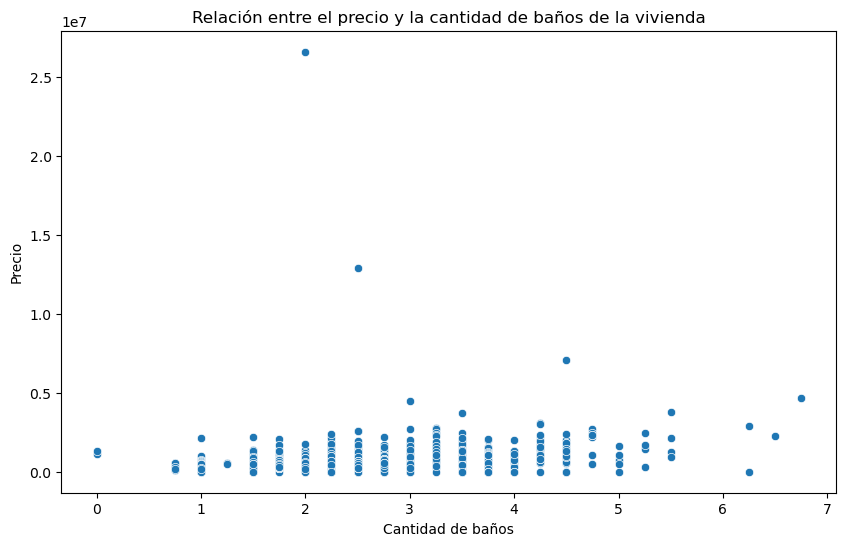

In [85]:
plt.figure(figsize = (10, 6))
sns.scatterplot(
    data = house_df,
    x = 'bathrooms',
    y = 'price'
)

plt.title('Relación entre el precio y la cantidad de baños de la vivienda')
plt.xlabel('Cantidad de baños')
plt.ylabel('Precio')
plt.show()

#####  <center>Aplicación de Algoritmos</center>

<div style="text-align: justify;">
Los algoritmos a aplicar serán del tipo predictivos, para ellos haremos uso de la librería SciKit Learn de Python, por tanto nuestro primer paso es realizar los imports
</div>

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

<div style="text-align: justify;">
Primero usaremos un modelo de regresión lineal para predecir el precio de una casa según las siguientes características: Número de habitaciones, tamaño de la sala principal, número de baños, número de pisos y año en el que se construyó la propiedad.
</div>

In [87]:
X = house_df[[
    'bedrooms',
    'sqft_living',
    'bathrooms',
    'floors',
    'yr_built',
]]

Y = house_df['price']

model = LinearRegression()
model.fit(X, Y)

n_bedrooms = 3
n_living = 1500
n_bathrooms = 2.75
n_floors = 2
n_yr_built = 2007

n_price = model.predict([[n_bedrooms, n_living, n_bathrooms, n_floors, n_yr_built]])[0]
print("Predicted price: ",n_price)

Predicted price:  359029.09928015247


/home/danielhz19/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<div style="text-align: justify;">
Por último, se aplicara un algoritmo de agrupación sobre el conjunto de datos.
</div>

In [88]:
features = ['price', 'sqft_above']
kmeans = KMeans(n_clusters = 5, random_state = 0)

kmeans.fit(correlation_df[features])

house_df['Cluster'] = kmeans.labels_

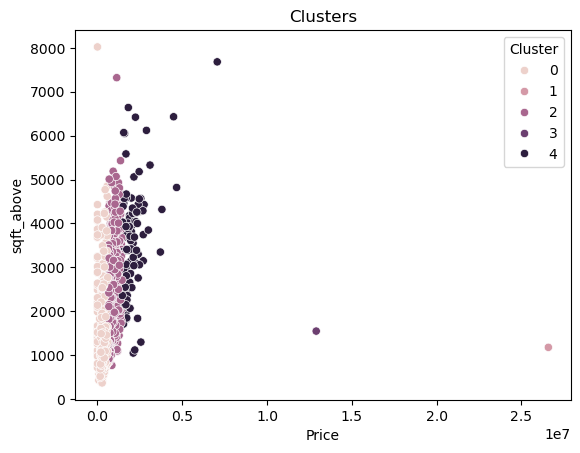

In [89]:
sns.scatterplot(
    x = 'price',
    y = 'sqft_above',
    hue = 'Cluster',
    data = house_df
)

plt.xlabel('Price')
plt.ylabel('sqft_above')
plt.title('Clusters')
plt.show()